In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate

In [0]:
bs = 64

In [0]:
# Inside Data
# Dataset link: http://www.robots.ox.ac.uk/~vgg/data/pets/

help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [0]:
path = untar_data(URLs.PETS)
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [0]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [0]:
path_anno = path/'annotations'
path_img  = path/'images'

In [0]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pug_112.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/german_shorthaired_184.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pug_63.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_82.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_62.jpg')]

In [0]:
np.random.seed(2)
pattern = r'/([^/]+)_\d+.jpg$'

In [0]:
data = ImageDataBunch.from_name_re(path_img, 
                                   fnames, 
                                   pattern, 
                                   ds_tfms=get_transforms(), size=224, bs=bs
                                  ).normalize(imagenet_stats)

In [0]:
help(data.show_batch)

Help on method show_batch in module fastai.basic_data:

show_batch(rows:int=5, ds_type:fastai.basic_data.DatasetType=<DatasetType.Train: 1>, reverse:bool=False, **kwargs) -> None method of fastai.vision.data.ImageDataBunch instance
    Show a batch of data in `ds_type` on a few `rows`.



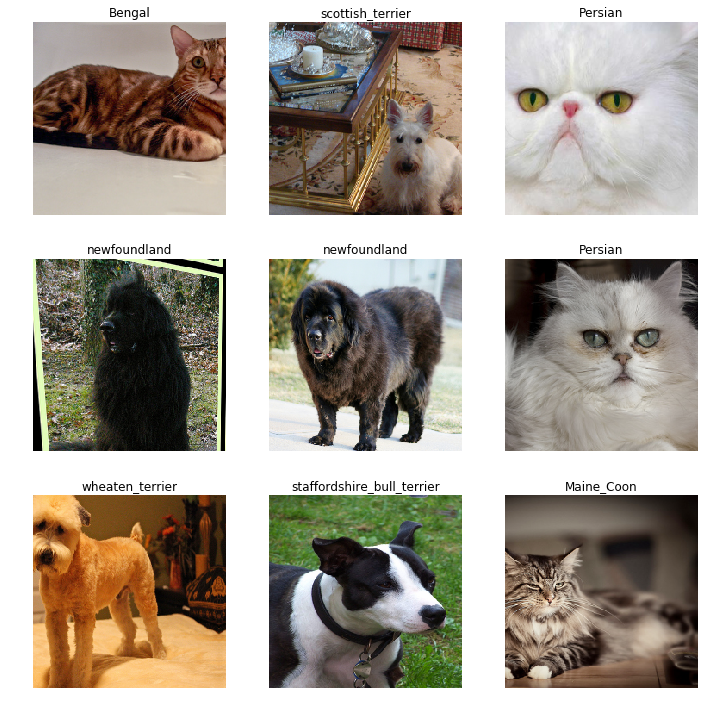

In [0]:
data.show_batch(rows = 3, figsize = (10,10))

In [0]:
print(data.classes)

['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']


In [0]:
len(data.classes)

37

In [0]:
data.c

37

In [0]:
len(data.classes), data.c

(37, 37)

In [0]:
# Training resnet34 

learn = cnn_learner(data, models.resnet34, metrics = error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:04<00:00, 21.4MB/s]


In [0]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [44]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.394182,0.308219,0.103518,35:19
1,0.599848,0.287107,0.094046,35:27
2,0.387569,0.260847,0.082544,35:31
3,0.289107,0.232560,0.071719,35:36


In [0]:
learn.save('stage-1')

### Results
At first, let's see which categories that the model most confused with one another. Let's see what the model predicted is reasonable or not.  

In [46]:
interpretation = ClassificationInterpretation.from_learner(learn)
losses, idxs = interpretation.top_losses()
len(data.valid_ds) == len(losses) == len(idxs)

True

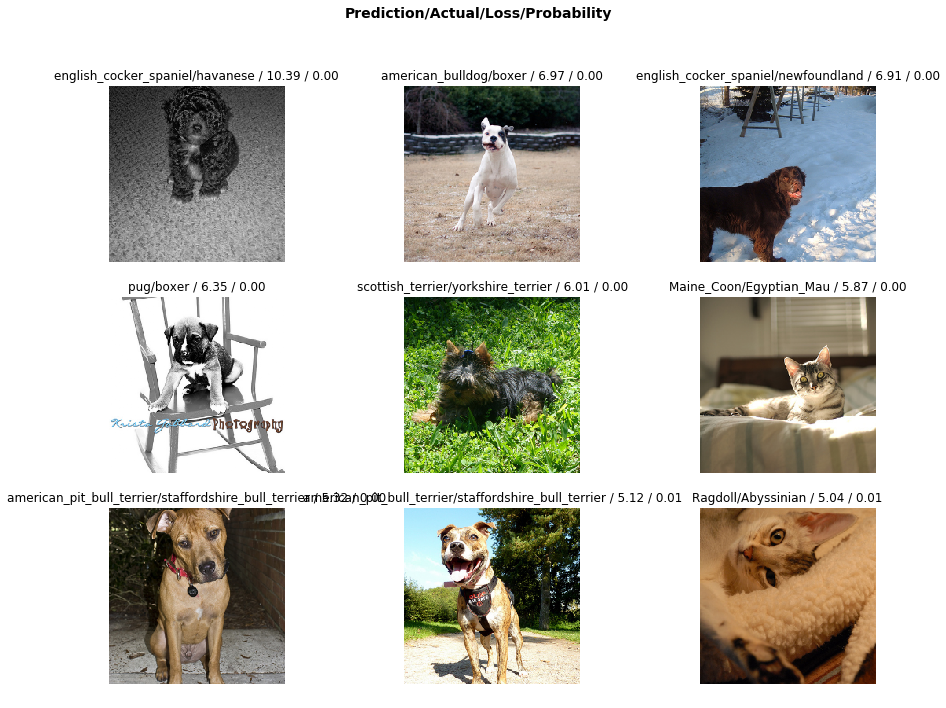

In [51]:
# Top loss examples / The model predicted wrong 
interpretation.plot_top_losses(9, figsize=(15, 11))

In [52]:
doc(interpretation.plot_top_losses)

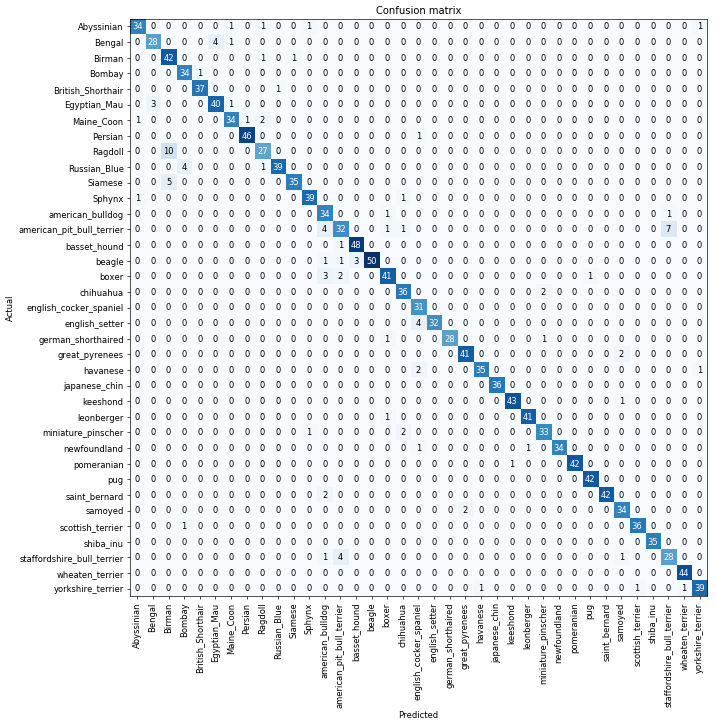

In [54]:
interpretation.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [56]:
interpretation.most_confused(min_val=2)

[('Ragdoll', 'Birman', 10),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('Siamese', 'Birman', 5),
 ('Bengal', 'Egyptian_Mau', 4),
 ('Russian_Blue', 'Bombay', 4),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('english_setter', 'english_cocker_spaniel', 4),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 4),
 ('Egyptian_Mau', 'Bengal', 3),
 ('beagle', 'basset_hound', 3),
 ('boxer', 'american_bulldog', 3),
 ('Maine_Coon', 'Ragdoll', 2),
 ('boxer', 'american_pit_bull_terrier', 2),
 ('chihuahua', 'miniature_pinscher', 2),
 ('great_pyrenees', 'samoyed', 2),
 ('havanese', 'english_cocker_spaniel', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('saint_bernard', 'american_bulldog', 2),
 ('samoyed', 'great_pyrenees', 2)]

#### Unfreezing, fine-tuning, and learning rates

In [0]:
learn.unfreeze()

In [58]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.653630,0.379592,0.119080,51:36


In [0]:
learn.load('stage-1');

In [60]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


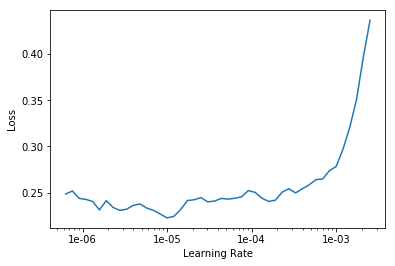

In [61]:
learn.recorder.plot()